In [35]:
# 0. Veri Setinin Hazırlanması
Veri Seti ve Adresi
Video Game Reviews and Ratings : https://www.kaggle.com/datasets/jahnavipaliwal/video-game-reviews-and-ratings:

SyntaxError: invalid syntax (1719812618.py, line 2)

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

In [ ]:
df_ = pd.read_csv(filepath_or_buffer = "/kaggle/input/video-game-reviews-and-ratings/video_game_reviews.csv")
df = df_.copy()

In [ ]:
# Veri setinde rasgele eksik veriler oluşturuldu.

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

In [36]:
df.head(n= 3)

,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
0,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015.0,NaN,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1.0
1,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015.0,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3.0
2,Minecraft,26.8,Teens,44.93,NaN,Yes,Bungie,Capcom,2012.0,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphics could be better.",Offline,5.0


In [37]:
df.shape

(47774, 18)

In [38]:
print(list(df.columns), '\n')
print(f"Veri seti içerisinde toplam {len(df.columns)} kolon vardır.\n")
print(f"df.columns'un döndüğü veri tipi: {type(df.columns)}\n")

['Game Title', 'User Rating', 'Age Group Targeted', 'Price', 'Platform', 'Requires Special Device', 'Developer', 'Publisher', 'Release Year', 'Genre', 'Multiplayer', 'Game Length (Hours)', 'Graphics Quality', 'Soundtrack Quality', 'Story Quality', 'User Review Text', 'Game Mode', 'Min Number of Players'] 

Veri seti içerisinde toplam 18 kolon vardır.

df.columns'un döndüğü veri tipi: <class 'pandas.core.indexes.base.Index'>



In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47774 entries, 0 to 47773
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Game Title               46376 non-null  category
 1   User Rating              46370 non-null  float64 
 2   Age Group Targeted       46392 non-null  category
 3   Price                    46329 non-null  float64 
 4   Platform                 46289 non-null  category
 5   Requires Special Device  46382 non-null  category
 6   Developer                46410 non-null  category
 7   Publisher                46369 non-null  category
 8   Release Year             46409 non-null  float64 
 9   Genre                    46386 non-null  category
 10  Multiplayer              46341 non-null  category
 11  Game Length (Hours)      46438 non-null  float64 
 12  Graphics Quality         46263 non-null  category
 13  Soundtrack Quality       46343 non-null  category
 14  Story 

In [40]:
df.dtypes

Game Title                 category
User Rating                 float64
Age Group Targeted         category
Price                       float64
Platform                   category
Requires Special Device    category
Developer                  category
Publisher                  category
Release Year                float64
Genre                      category
Multiplayer                category
Game Length (Hours)         float64
Graphics Quality           category
Soundtrack Quality         category
Story Quality              category
User Review Text           category
Game Mode                  category
Min Number of Players       float64
dtype: object

In [41]:
df_.columns

Index(['Game Title', 'User Rating', 'Age Group Targeted', 'Price', 'Platform',
       'Requires Special Device', 'Developer', 'Publisher', 'Release Year',
       'Genre', 'Multiplayer', 'Game Length (Hours)', 'Graphics Quality',
       'Soundtrack Quality', 'Story Quality', 'User Review Text', 'Game Mode',
       'Min Number of Players'],
      dtype='object')

In [42]:
categorical_features = []
numerical_features = []

for col in df.columns:
    if (df[col].dtype == "object") or (df[col].dtype == "categorical"):
        categorical_features.append(col)
    else:
        numerical_features.append(col)


In [43]:
categorical_features, numerical_features

([],
 ['Game Title',
  'User Rating',
  'Age Group Targeted',
  'Price',
  'Platform',
  'Requires Special Device',
  'Developer',
  'Publisher',
  'Release Year',
  'Genre',
  'Multiplayer',
  'Game Length (Hours)',
  'Graphics Quality',
  'Soundtrack Quality',
  'Story Quality',
  'User Review Text',
  'Game Mode',
  'Min Number of Players'])

In [44]:
for col in df.columns:
    if col in categorical_features:
        df[col] = pd.Categorical(df[col])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47774 entries, 0 to 47773
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Game Title               46376 non-null  category
 1   User Rating              46370 non-null  float64 
 2   Age Group Targeted       46392 non-null  category
 3   Price                    46329 non-null  float64 
 4   Platform                 46289 non-null  category
 5   Requires Special Device  46382 non-null  category
 6   Developer                46410 non-null  category
 7   Publisher                46369 non-null  category
 8   Release Year             46409 non-null  float64 
 9   Genre                    46386 non-null  category
 10  Multiplayer              46341 non-null  category
 11  Game Length (Hours)      46438 non-null  float64 
 12  Graphics Quality         46263 non-null  category
 13  Soundtrack Quality       46343 non-null  category
 14  Story 

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User Rating,46370.0,29.737710,7.545134,10.10,24.30,29.80,35.20,49.50
Price,46329.0,39.932107,11.518339,19.99,29.97,39.82,49.93,59.99
Release Year,46409.0,2016.476610,4.026216,2010.00,2013.00,2016.00,2020.00,2023.00
Game Length (Hours),46438.0,32.480535,15.872783,5.00,18.80,32.50,46.30,60.00
Min Number of Players,46303.0,5.120964,2.768865,1.00,3.00,5.00,7.00,10.00


# 2. Eksik Veri Analizi

# 2.1 Eksik Verilerin Gözlemlenmesi# 

In [47]:
df.isna().sum()

Game Title                 1398
User Rating                1404
Age Group Targeted         1382
Price                      1445
Platform                   1485
Requires Special Device    1392
Developer                  1364
Publisher                  1405
Release Year               1365
Genre                      1388
Multiplayer                1433
Game Length (Hours)        1336
Graphics Quality           1511
Soundtrack Quality         1431
Story Quality              1412
User Review Text           1465
Game Mode                  1345
Min Number of Players      1471
dtype: int64

In [48]:
df.isna().sum().sum()

25432

In [49]:
df.notnull().sum()

Game Title                 46376
User Rating                46370
Age Group Targeted         46392
Price                      46329
Platform                   46289
Requires Special Device    46382
Developer                  46410
Publisher                  46369
Release Year               46409
Genre                      46386
Multiplayer                46341
Game Length (Hours)        46438
Graphics Quality           46263
Soundtrack Quality         46343
Story Quality              46362
User Review Text           46309
Game Mode                  46429
Min Number of Players      46303
dtype: int64

In [50]:
print(f"Veri seti içerisinde toplam {df.notnull().sum().sum()} adet eksik olmayan, {df.isnull().sum().sum()} eksik gözlem var.")

Veri seti içerisinde toplam 834500 adet eksik olmayan, 25432 eksik gözlem var.


In [51]:
df[df.isnull().any(axis = 1)]

,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
0,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015.0,NaN,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1.0
2,Minecraft,26.8,Teens,44.93,NaN,Yes,Bungie,Capcom,2012.0,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphics could be better.",Offline,5.0
3,Bioshock Infinite,38.4,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015.0,Sports,NaN,41.9,Medium,Good,Excellent,"Solid game, but the graphics could be better.",Online,4.0
6,Sid Meier’s Civilization VI,33.1,Adults,46.44,Mobile,No,Game Freak,Innersloth,2020.0,Simulation,No,36.9,High,NaN,Good,"Solid game, but the gameplay is amazing.",NaN,3.0
11,Street Fighter V,37.4,NaN,58.01,PlayStation,No,Game Freak,Epic Games,2010.0,Fighting,Yes,29.2,Medium,Average,Average,"Solid game, but too many bugs.",Offline,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47769,Minecraft,41.6,All Ages,49.11,PlayStation,Yes,Valve,Innersloth,2016.0,Party,No,56.7,Low,Excellent,Average,NaN,Online,4.0
47770,The Legend of Zelda: Breath of the Wild,24.2,Kids,NaN,Xbox,Yes,Valve,Electronic Arts,2023.0,Strategy,No,29.7,High,Good,Excellent,"Solid game, but the graphics could be better.",Offline,1.0
47771,Animal Crossing: New Horizons,26.7,NaN,44.90,PlayStation,Yes,Game Freak,Square Enix,2018.0,Sports,No,8.2,Low,Poor,Good,"Great game, but the gameplay is amazing.",Offline,5.0
47772,The Legend of Zelda: Breath of the Wild,22.5,Kids,29.99,Xbox,Yes,Epic Games,Epic Games,NaN,Simulation,Yes,29.7,High,Poor,Excellent,"Disappointing game, but the graphics could be ...",Offline,1.0


In [52]:
df[df.notnull().all(axis = 1)][:5]

,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
1,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015.0,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3.0
4,Half-Life: Alyx,30.1,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022.0,RPG,Yes,13.2,High,Poor,Good,"Great game, but too many bugs.",Offline,1.0
5,Grand Theft Auto V,38.6,Adults,51.73,Xbox,No,Capcom,Capcom,2017.0,RPG,Yes,48.8,Low,Average,Poor,"Solid game, but the graphics could be better.",Offline,4.0
7,Just Dance 2024,32.3,Teens,36.92,Nintendo Switch,No,Capcom,Take-Two Interactive,2012.0,Strategy,No,52.1,Ultra,Poor,Poor,"Disappointing game, but the gameplay is amazing.",Offline,3.0
8,Sid Meier’s Civilization VI,26.7,All Ages,22.20,Nintendo Switch,No,Epic Games,Epic Games,2010.0,Fighting,No,56.4,Low,Average,Good,"Great game, but the gameplay is amazing.",Online,10.0


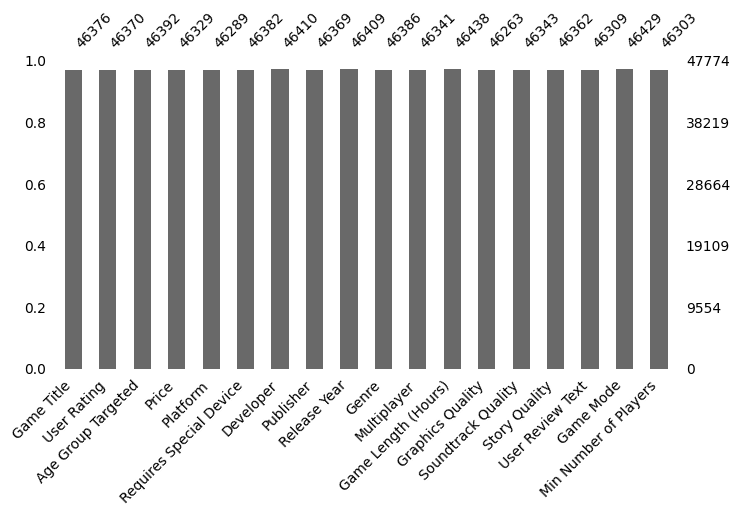

In [55]:
import missingno as msno

msno.bar(df = df,
         figsize = (8, 4),
         fontsize = 10);

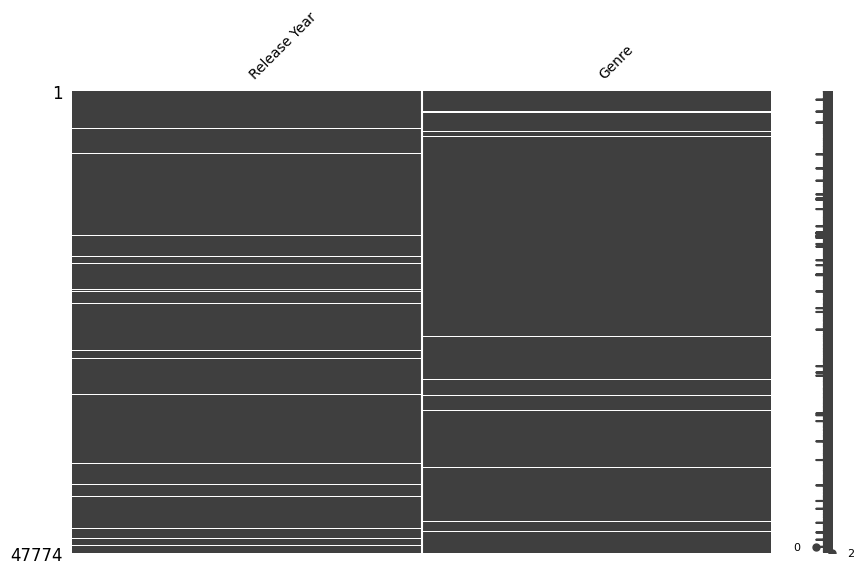

In [59]:
msno.matrix(df = df[['Release Year', 'Genre']],
            figsize = (10, 6),
            fontsize = 10);

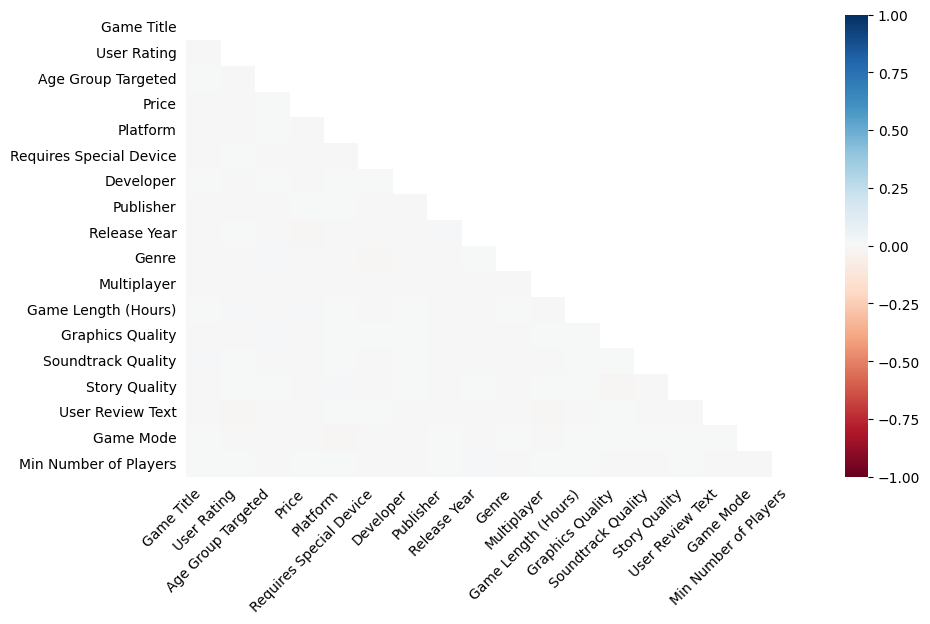

In [60]:
msno.heatmap(df = df,
             figsize = (10, 6),
             fontsize = 10);

# 2.2 Yöntem 1: Eksik Verilerin Silinmesi

In [61]:
df.dropna(inplace = False)[:5]

,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
1,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015.0,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3.0
4,Half-Life: Alyx,30.1,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022.0,RPG,Yes,13.2,High,Poor,Good,"Great game, but too many bugs.",Offline,1.0
5,Grand Theft Auto V,38.6,Adults,51.73,Xbox,No,Capcom,Capcom,2017.0,RPG,Yes,48.8,Low,Average,Poor,"Solid game, but the graphics could be better.",Offline,4.0
7,Just Dance 2024,32.3,Teens,36.92,Nintendo Switch,No,Capcom,Take-Two Interactive,2012.0,Strategy,No,52.1,Ultra,Poor,Poor,"Disappointing game, but the gameplay is amazing.",Offline,3.0
8,Sid Meier’s Civilization VI,26.7,All Ages,22.20,Nintendo Switch,No,Epic Games,Epic Games,2010.0,Fighting,No,56.4,Low,Average,Good,"Great game, but the gameplay is amazing.",Online,10.0


In [62]:
df.dropna(axis = 1)

""
0
1
2
3
4
...
47769
47770
47771
47772


In [63]:
df

,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
0,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015.0,NaN,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1.0
1,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015.0,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3.0
2,Minecraft,26.8,Teens,44.93,NaN,Yes,Bungie,Capcom,2012.0,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphics could be better.",Offline,5.0
3,Bioshock Infinite,38.4,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015.0,Sports,NaN,41.9,Medium,Good,Excellent,"Solid game, but the graphics could be better.",Online,4.0
4,Half-Life: Alyx,30.1,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022.0,RPG,Yes,13.2,High,Poor,Good,"Great game, but too many bugs.",Offline,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47769,Minecraft,41.6,All Ages,49.11,PlayStation,Yes,Valve,Innersloth,2016.0,Party,No,56.7,Low,Excellent,Average,NaN,Online,4.0
47770,The Legend of Zelda: Breath of the Wild,24.2,Kids,NaN,Xbox,Yes,Valve,Electronic Arts,2023.0,Strategy,No,29.7,High,Good,Excellent,"Solid game, but the graphics could be better.",Offline,1.0
47771,Animal Crossing: New Horizons,26.7,NaN,44.90,PlayStation,Yes,Game Freak,Square Enix,2018.0,Sports,No,8.2,Low,Poor,Good,"Great game, but the gameplay is amazing.",Offline,5.0
47772,The Legend of Zelda: Breath of the Wild,22.5,Kids,29.99,Xbox,Yes,Epic Games,Epic Games,NaN,Simulation,Yes,29.7,High,Poor,Excellent,"Disappointing game, but the graphics could be ...",Offline,1.0


# 2.3 Yöntem 2: Eksik Verilerin Doldurulması

In [64]:
df_fillna = df.copy()

df_fillna.head(3)

,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
0,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015.0,NaN,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1.0
1,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015.0,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3.0
2,Minecraft,26.8,Teens,44.93,NaN,Yes,Bungie,Capcom,2012.0,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphics could be better.",Offline,5.0


In [65]:
df_fillna.isna().sum()

Game Title                 1398
User Rating                1404
Age Group Targeted         1382
Price                      1445
Platform                   1485
Requires Special Device    1392
Developer                  1364
Publisher                  1405
Release Year               1365
Genre                      1388
Multiplayer                1433
Game Length (Hours)        1336
Graphics Quality           1511
Soundtrack Quality         1431
Story Quality              1412
User Review Text           1465
Game Mode                  1345
Min Number of Players      1471
dtype: int64

2.3.1 Sayısal Değişkenlerin Doldurulması

In [67]:
mean_salary = df_fillna['Price'].mean()

df_fillna['Price'].fillna(value = mean_salary, inplace = True)

df_fillna.isna().sum()

/tmp/ipykernel_30/3195912028.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna['Price'].fillna(value = mean_salary, inplace = True)


Game Title                 1398
User Rating                1404
Age Group Targeted         1382
Price                         0
Platform                   1485
Requires Special Device    1392
Developer                  1364
Publisher                  1405
Release Year               1365
Genre                      1388
Multiplayer                1433
Game Length (Hours)        1336
Graphics Quality           1511
Soundtrack Quality         1431
Story Quality              1412
User Review Text           1465
Game Mode                  1345
Min Number of Players      1471
dtype: int64

In [68]:
to_be_filled = numerical_features[1:]

for col in to_be_filled:
    df_fillna[col].fillna(df[col].mean(), inplace = True)

/tmp/ipykernel_30/428597042.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna[col].fillna(df[col].mean(), inplace = True)


TypeError: 'Categorical' with dtype category does not support reduction 'mean'

In [69]:
numerical_features[1:]

['User Rating',
 'Age Group Targeted',
 'Price',
 'Platform',
 'Requires Special Device',
 'Developer',
 'Publisher',
 'Release Year',
 'Genre',
 'Multiplayer',
 'Game Length (Hours)',
 'Graphics Quality',
 'Soundtrack Quality',
 'Story Quality',
 'User Review Text',
 'Game Mode',
 'Min Number of Players']

In [70]:
df_fillna.isna().sum()

Game Title                 1398
User Rating                   0
Age Group Targeted         1382
Price                         0
Platform                   1485
Requires Special Device    1392
Developer                  1364
Publisher                  1405
Release Year               1365
Genre                      1388
Multiplayer                1433
Game Length (Hours)        1336
Graphics Quality           1511
Soundtrack Quality         1431
Story Quality              1412
User Review Text           1465
Game Mode                  1345
Min Number of Players      1471
dtype: int64

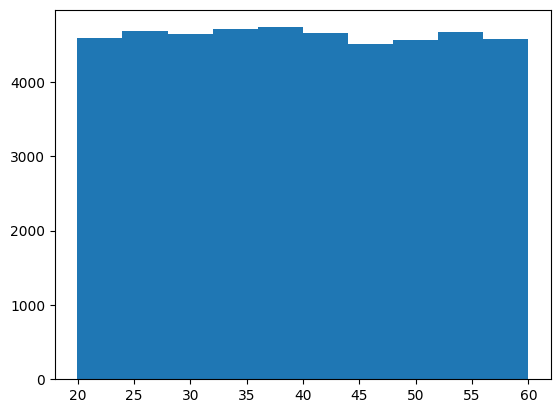

In [78]:
plt.hist(df['Price'])
plt.show()

2.3.2 Kategorik Değişkenlerin Doldurulması

In [81]:
# work_setting değişkeninde toplam kaç adet eksik değer olduğunu görelim.
df_fillna['Age Group Targeted'].isna().sum()

# work_setting değişkeninde en çok tekrar eden değeri(mode) alalım.
work_setting_mode = df_fillna['Age Group Targeted'].mode()

# work_setting değişkenini mode değeri ile dolduralım.
df_fillna['Age Group Targeted'] = df_fillna['Age Group Targeted'].fillna(value = work_setting_mode[0])

# work_setting değişkeninde toplam kaç adet eksik değer olduğunu tekrar görelim.
df_fillna.isna().sum()

Game Title                 1398
User Rating                   0
Age Group Targeted            0
Price                         0
Platform                   1485
Requires Special Device    1392
Developer                  1364
Publisher                  1405
Release Year               1365
Genre                      1388
Multiplayer                1433
Game Length (Hours)        1336
Graphics Quality           1511
Soundtrack Quality         1431
Story Quality              1412
User Review Text           1465
Game Mode                  1345
Min Number of Players      1471
dtype: int64

In [82]:
df_fillna[["Platform"]]

,Platform
0,PC
1,PC
2,NaN
3,Mobile
4,PlayStation
...,...
47769,PlayStation
47770,Xbox
47771,PlayStation
47772,Xbox


In [83]:
df_fillna["Platform"].fillna(method = "bfill")

/tmp/ipykernel_30/107647441.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fillna["Platform"].fillna(method = "bfill")


0                 PC
1                 PC
2             Mobile
3             Mobile
4        PlayStation
            ...     
47769    PlayStation
47770           Xbox
47771    PlayStation
47772           Xbox
47773    PlayStation
Name: Platform, Length: 47774, dtype: category
Categories (5, object): ['Mobile', 'Nintendo Switch', 'PC', 'PlayStation', 'Xbox']

In [84]:
df_fillna["Platform"].fillna(method = "ffill")

/tmp/ipykernel_30/581976228.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fillna["Platform"].fillna(method = "ffill")


0                 PC
1                 PC
2                 PC
3             Mobile
4        PlayStation
            ...     
47769    PlayStation
47770           Xbox
47771    PlayStation
47772           Xbox
47773    PlayStation
Name: Platform, Length: 47774, dtype: category
Categories (5, object): ['Mobile', 'Nintendo Switch', 'PC', 'PlayStation', 'Xbox']

2.3.3 Kategorik Kırılım İle Doldurma İşlemi

In [85]:
df_categorical_fillna = df.copy()

df_categorical_fillna.isna().sum()

Game Title                 1398
User Rating                1404
Age Group Targeted         1382
Price                      1445
Platform                   1485
Requires Special Device    1392
Developer                  1364
Publisher                  1405
Release Year               1365
Genre                      1388
Multiplayer                1433
Game Length (Hours)        1336
Graphics Quality           1511
Soundtrack Quality         1431
Story Quality              1412
User Review Text           1465
Game Mode                  1345
Min Number of Players      1471
dtype: int64

In [86]:
df_categorical_fillna.isna().sum()

Game Title                 1398
User Rating                1404
Age Group Targeted         1382
Price                      1445
Platform                   1485
Requires Special Device    1392
Developer                  1364
Publisher                  1405
Release Year               1365
Genre                      1388
Multiplayer                1433
Game Length (Hours)        1336
Graphics Quality           1511
Soundtrack Quality         1431
Story Quality              1412
User Review Text           1465
Game Mode                  1345
Min Number of Players      1471
dtype: int64

# 3. Kategorik Değişken Analizi# 

In [87]:
df = df_.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47774 entries, 0 to 47773
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Game Title               47774 non-null  object 
 1   User Rating              47774 non-null  float64
 2   Age Group Targeted       47774 non-null  object 
 3   Price                    47774 non-null  float64
 4   Platform                 47774 non-null  object 
 5   Requires Special Device  47774 non-null  object 
 6   Developer                47774 non-null  object 
 7   Publisher                47774 non-null  object 
 8   Release Year             47774 non-null  int64  
 9   Genre                    47774 non-null  object 
 10  Multiplayer              47774 non-null  object 
 11  Game Length (Hours)      47774 non-null  float64
 12  Graphics Quality         47774 non-null  object 
 13  Soundtrack Quality       47774 non-null  object 
 14  Story Quality         

In [88]:
df_categorical = df.select_dtypes(include = "object")
df_categorical.head(3)

,Game Title,Age Group Targeted,Platform,Requires Special Device,Developer,Publisher,Genre,Multiplayer,Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode
0,Grand Theft Auto V,All Ages,PC,No,Game Freak,Innersloth,Adventure,No,Medium,Average,Poor,"Solid game, but too many bugs.",Offline
1,The Sims 4,Adults,PC,No,Nintendo,Electronic Arts,Shooter,Yes,Low,Poor,Poor,"Solid game, but too many bugs.",Offline
2,Minecraft,Teens,PC,Yes,Bungie,Capcom,Adventure,Yes,Low,Good,Average,"Great game, but the graphics could be better.",Offline


In [89]:
df_categorical["Game Title"].unique()

array(['Grand Theft Auto V', 'The Sims 4', 'Minecraft',
       'Bioshock Infinite', 'Half-Life: Alyx',
       'Sid Meier’s Civilization VI', 'Just Dance 2024',
       '1000-Piece Puzzle', 'Spelunky 2', 'Street Fighter V', 'Fall Guys',
       'Rocket League', 'The Elder Scrolls V: Skyrim', 'Among Us',
       'Stardew Valley', 'Call of Duty: Modern Warfare 2',
       'The Legend of Zelda: Breath of the Wild', 'Tekken 7',
       'Pillars of Eternity II: Deadfire',
       'Animal Crossing: New Horizons', 'Hades', 'Mario Kart 8 Deluxe',
       'Overwatch 2', 'Fortnite', 'Pokémon Scarlet & Violet', 'Hitman 3',
       'Tomb Raider (2013)', 'Halo Infinite',
       'Super Smash Bros. Ultimate', 'Kingdom Hearts III',
       'League of Legends', 'The Witcher 3: Wild Hunt', 'FIFA 24',
       'Ghost of Tsushima', 'Cuphead', 'Red Dead Redemption 2',
       'Portal 2', 'Tetris', 'Counter-Strike: Global Offensive',
       'Super Mario Odyssey'], dtype=object)

In [90]:
for col in df_categorical.columns:
    print(f'There are {df_categorical[col].nunique()} unique values in "{col}" categorical feature.\n')

There are 40 unique values in "Game Title" categorical feature.

There are 4 unique values in "Age Group Targeted" categorical feature.

There are 5 unique values in "Platform" categorical feature.

There are 2 unique values in "Requires Special Device" categorical feature.

There are 10 unique values in "Developer" categorical feature.

There are 9 unique values in "Publisher" categorical feature.

There are 10 unique values in "Genre" categorical feature.

There are 2 unique values in "Multiplayer" categorical feature.

There are 4 unique values in "Graphics Quality" categorical feature.

There are 4 unique values in "Soundtrack Quality" categorical feature.

There are 4 unique values in "Story Quality" categorical feature.

There are 12 unique values in "User Review Text" categorical feature.

There are 2 unique values in "Game Mode" categorical feature.



In [91]:
for col in df_categorical.columns:
    print(f'{df_categorical[col].value_counts()}\n', 5*"*********")

Game Title
Pokémon Scarlet & Violet                   1274
Minecraft                                  1265
FIFA 24                                    1247
Tomb Raider (2013)                         1245
Street Fighter V                           1245
Super Smash Bros. Ultimate                 1235
Fall Guys                                  1232
Hitman 3                                   1229
Tetris                                     1224
1000-Piece Puzzle                          1222
Kingdom Hearts III                         1220
Half-Life: Alyx                            1219
Spelunky 2                                 1219
The Witcher 3: Wild Hunt                   1216
Stardew Valley                             1209
Tekken 7                                   1209
Call of Duty: Modern Warfare 2             1208
Animal Crossing: New Horizons              1208
Pillars of Eternity II: Deadfire           1207
Overwatch 2                                1203
Portal 2                     

In [92]:
comp_categories = df["Genre"].unique().tolist()[::-1]
comp_categories

['Puzzle',
 'Party',
 'Action',
 'Fighting',
 'Strategy',
 'Simulation',
 'RPG',
 'Sports',
 'Shooter',
 'Adventure']

In [95]:
from pandas.api.types import CategoricalDtype

df["Genre"] = df["Genre"].astype(CategoricalDtype(categories = comp_categories, ordered = True))

In [96]:
df["Genre"].head()

0    Adventure
1      Shooter
2    Adventure
3       Sports
4          RPG
Name: Genre, dtype: category
Categories (10, object): ['Puzzle' < 'Party' < 'Action' < 'Fighting' ... 'RPG' < 'Sports' < 'Shooter' < 'Adventure']

# 3.2 Kategorik Değişkenlerde Görselleştirme İşlemleri

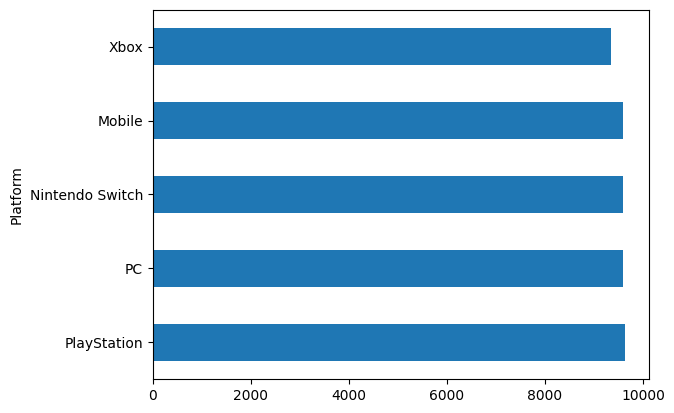

In [97]:
df['Platform'].value_counts().plot.barh();

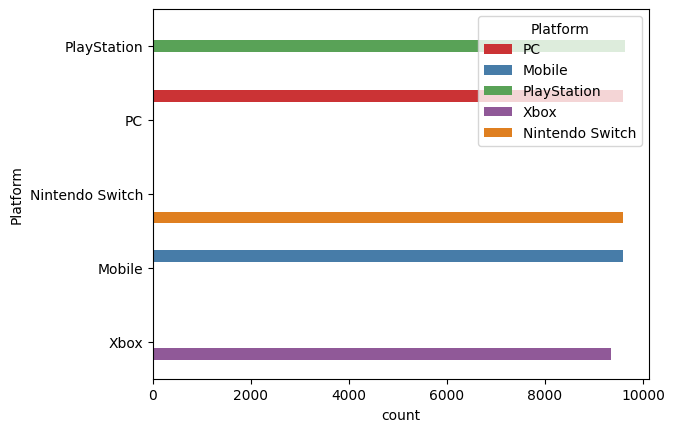

In [98]:
sns.countplot(data = df,
              y = "Platform",
              hue = "Platform",
              order = df["Platform"].value_counts().index,
              palette = "Set1");

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


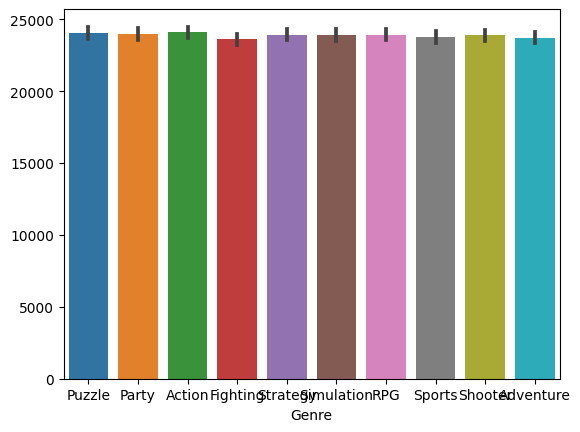

In [99]:
sns.barplot(data = df, x = "Genre", y = df.Genre.index);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


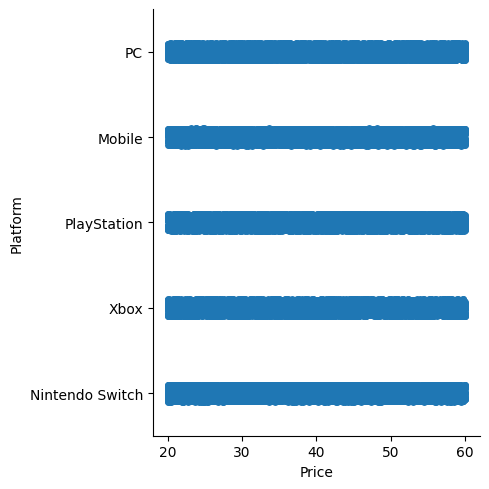

In [102]:
sns.catplot(data = df,
            x = "Price",
            y = "Platform");

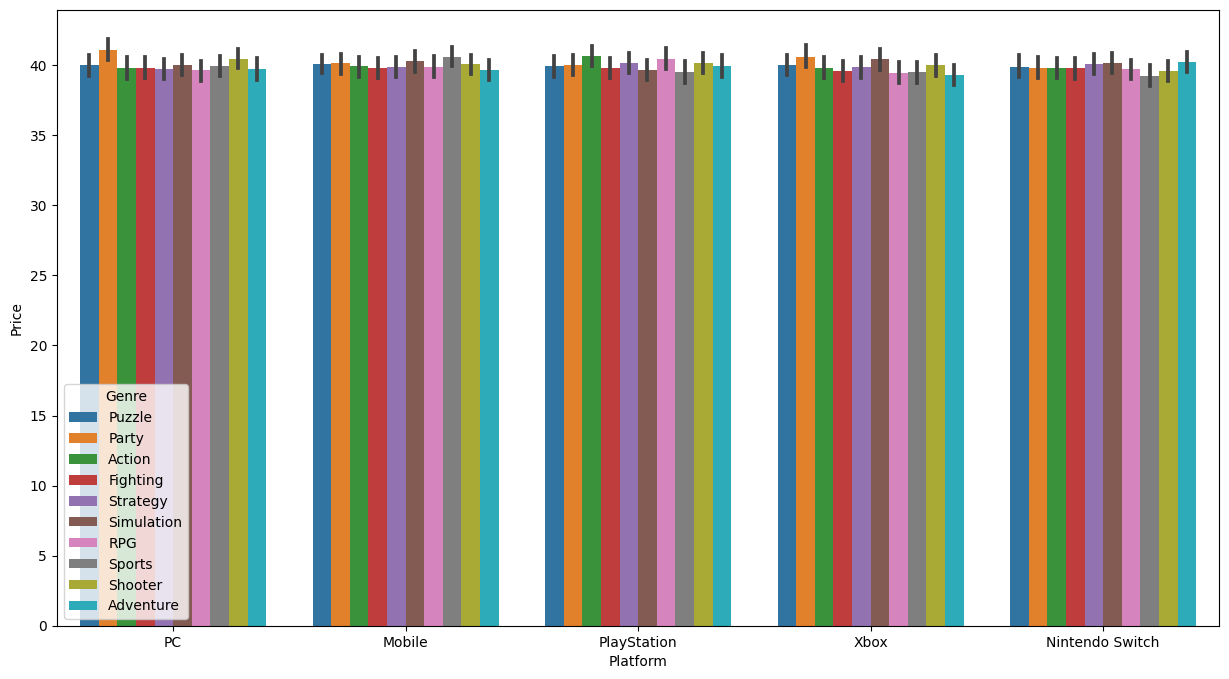

In [104]:
plt.figure(figsize = (15, 8))
sns.barplot(data = df,
            x = "Platform",
            y = "Price",
            hue = "Genre");

In [105]:
df.head()

,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
0,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015,Adventure,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1
1,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3
2,Minecraft,26.8,Teens,44.93,PC,Yes,Bungie,Capcom,2012,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphics could be better.",Offline,5
3,Bioshock Infinite,38.4,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015,Sports,No,41.9,Medium,Good,Excellent,"Solid game, but the graphics could be better.",Online,4
4,Half-Life: Alyx,30.1,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022,RPG,Yes,13.2,High,Poor,Good,"Great game, but too many bugs.",Offline,1


In [106]:
df_price = df.groupby(by = "Release Year")["Price"].mean().to_frame().reset_index().sort_values(by = "Price", ascending = False)

df_price

,Release Year,Price
1,2011,40.184955
2,2012,40.181624
0,2010,40.152565
12,2022,40.097444
3,2013,40.028856
13,2023,40.024809
5,2015,39.958758
9,2019,39.912928
6,2016,39.868790
7,2017,39.860598


In [107]:
df.groupby(by = ['Release Year', 'Platform'])['Price'].mean().to_frame().reset_index().sort_values(by = "Price", ascending = False)[:5]

,Release Year,Platform,Price
2,2010,PC,41.129102
60,2022,Mobile,40.993648
65,2023,Mobile,40.805263
69,2023,Xbox,40.657132
10,2012,Mobile,40.555819


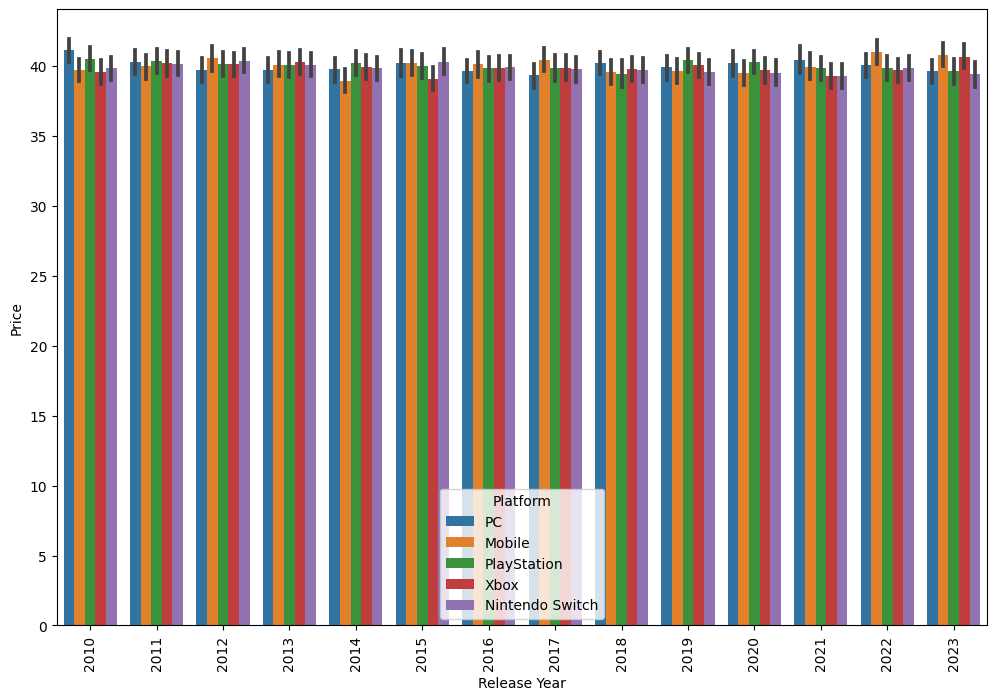

In [109]:
plt.figure(figsize = (12, 8))
plt.xticks(rotation = 90)
sns.barplot(data = df, x = "Release Year", y = "Price", hue = "Platform");

In [111]:
df_location = (
    df.groupby(by="Platform")["Genre"]
    .value_counts()
    .to_frame(name="count")  # Sütuna anlamlı bir ad veriyoruz
    .reset_index()
    .sort_values(by="count", ascending=False)  # 'count' sütununa göre sıralıyoruz
)
df_location_pc = df_location[df_location["Platform"] == "PC"]
df_location_pc


,Platform,Genre,count
20,PC,Strategy,1004
21,PC,RPG,989
22,PC,Puzzle,982
23,PC,Sports,964
24,PC,Simulation,962
25,PC,Shooter,956
26,PC,Action,941
27,PC,Fighting,937
28,PC,Party,933
29,PC,Adventure,931


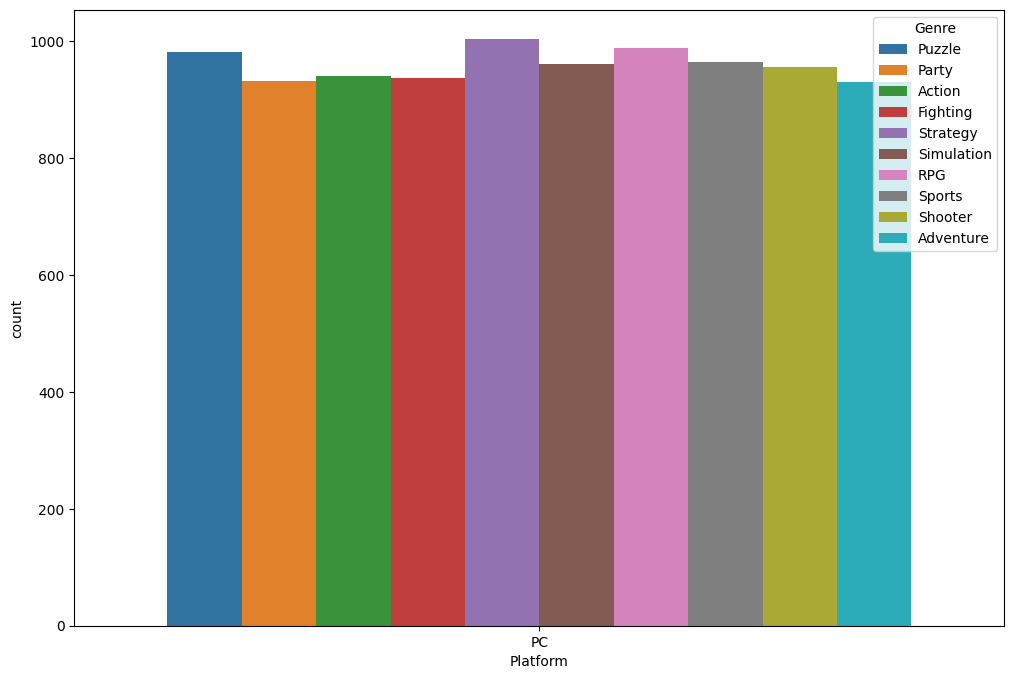

In [112]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_location_pc, x="Platform", y="count", hue="Genre");


# 4. Sürekli Değişken Analizi

4.1 Sürekli Değişkenlerin İncelenmesi

In [113]:
df_numerical = df.select_dtypes(include = ["float64", "int64"])
df_numerical.head()

,User Rating,Price,Release Year,Game Length (Hours),Min Number of Players
0,36.4,41.41,2015,55.3,1
1,38.3,57.56,2015,34.6,3
2,26.8,44.93,2012,13.9,5
3,38.4,48.29,2015,41.9,4
4,30.1,55.49,2022,13.2,1


In [114]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
User Rating,47774.0,29.719329,7.550131,10.10,24.30,29.700,35.1000,49.50
Price,47774.0,39.951371,11.520342,19.99,29.99,39.845,49.9575,59.99
Release Year,47774.0,2016.480952,4.027276,2010.00,2013.00,2016.000,2020.0000,2023.00
Game Length (Hours),47774.0,32.481672,15.872508,5.00,18.80,32.500,46.3000,60.00
Min Number of Players,47774.0,5.116758,2.769521,1.00,3.00,5.000,7.0000,10.00


In [122]:
def give_game_stats(dataframe: pd.DataFrame) -> None:
    """
    Prints statistical information for numerical columns in the game dataset.

    Args:
        dataframe (pd.DataFrame): The DataFrame object containing game data.
    
    Returns:
        None
    """
    # Sadece sayısal sütunları seç
    num_df = dataframe.select_dtypes(include=["float64", "int64"])

    if num_df.empty:
        print("No numerical columns found in the DataFrame.")
        return

    # Her sütun için istatistikleri yazdır
    for col in num_df.columns:
        print(f"********** {col} **********")
        print(f"Mean value: {num_df[col].mean():.2f}")
        print(f"Std deviation: {num_df[col].std():.2f}")
        print(f"Max value: {num_df[col].max()}")
        print(f"Min value: {num_df[col].min()}")
        print(f"Count: {num_df[col].count()}")
        print(f"Median value: {num_df[col].median()}\n")


In [123]:
give_game_stats(df)


********** User Rating **********
Mean value: 29.72
Std deviation: 7.55
Max value: 49.5
Min value: 10.1
Count: 47774
Median value: 29.7

********** Price **********
Mean value: 39.95
Std deviation: 11.52
Max value: 59.99
Min value: 19.99
Count: 47774
Median value: 39.845

********** Release Year **********
Mean value: 2016.48
Std deviation: 4.03
Max value: 2023
Min value: 2010
Count: 47774
Median value: 2016.0

********** Game Length (Hours) **********
Mean value: 32.48
Std deviation: 15.87
Max value: 60.0
Min value: 5.0
Count: 47774
Median value: 32.5

********** Min Number of Players **********
Mean value: 5.12
Std deviation: 2.77
Max value: 10
Min value: 1
Count: 47774
Median value: 5.0



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

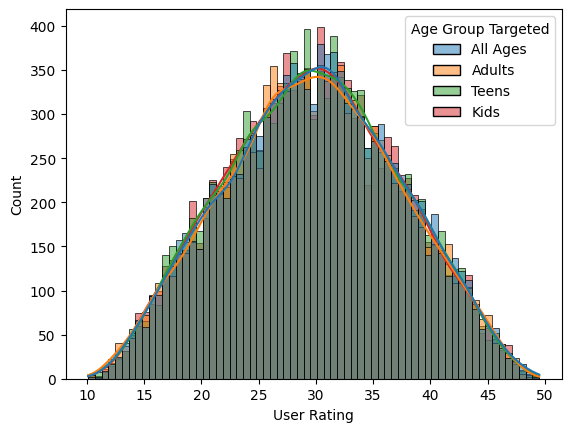

In [124]:
sns.histplot(data=df, x="User Rating", kde=True, hue="Age Group Targeted");


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


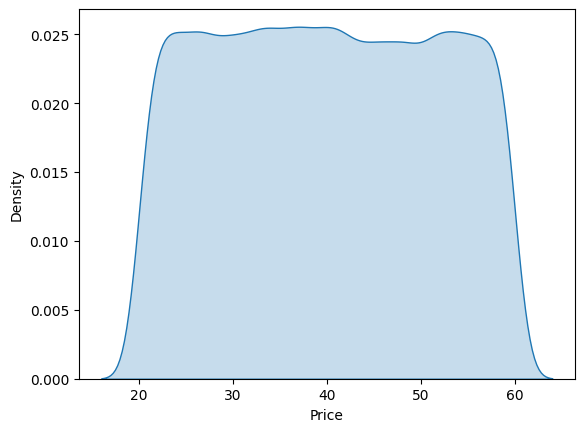

In [125]:
sns.kdeplot(df['Price'], fill = True);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

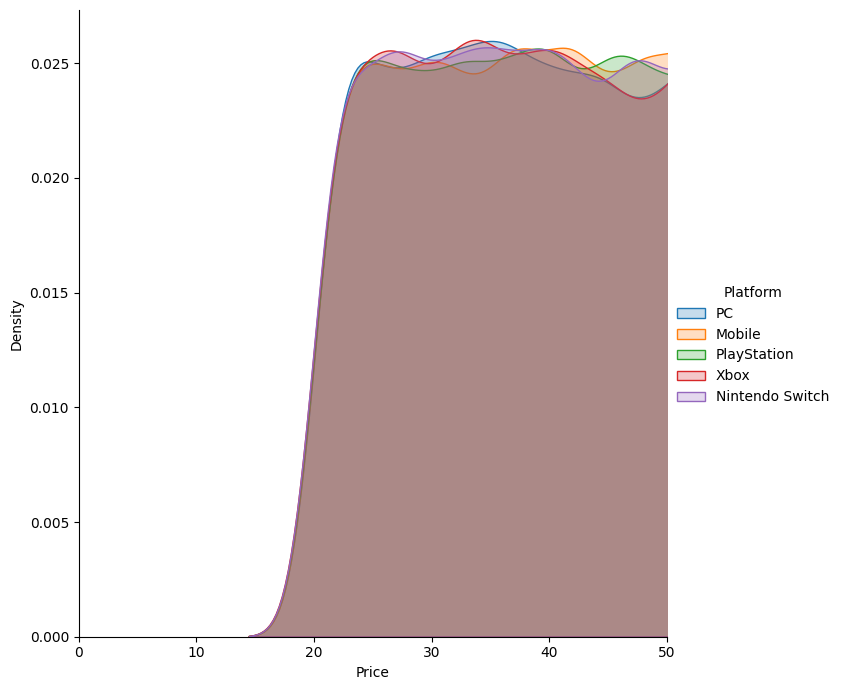

In [136]:
sns.FacetGrid(data = df,
              hue = "Platform",
              height = 7,
              xlim = (0, 50)).map(sns.kdeplot, "Price", fill = True).add_legend();

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


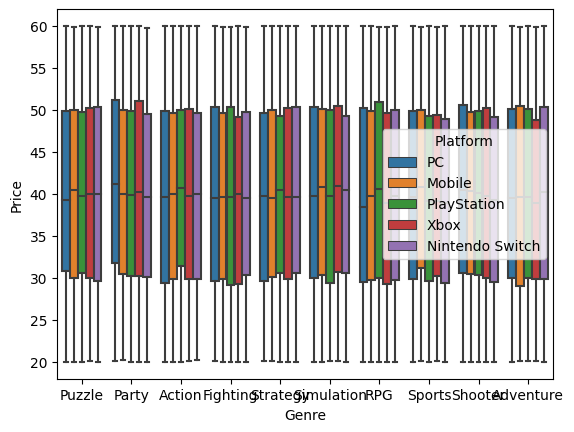

In [137]:
# Boxplot kategorik olarak numerik dağılımı gösterir, çeyreklik değerler ve IQR'a göre aykırı değerler de boxplot ile gözlemlenebilir.
sns.boxplot(data = df,
            x = "Genre",
            y = "Price",
            hue = "Platform");

In [138]:
iris = sns.load_dataset(name = "iris")
iris[:3]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

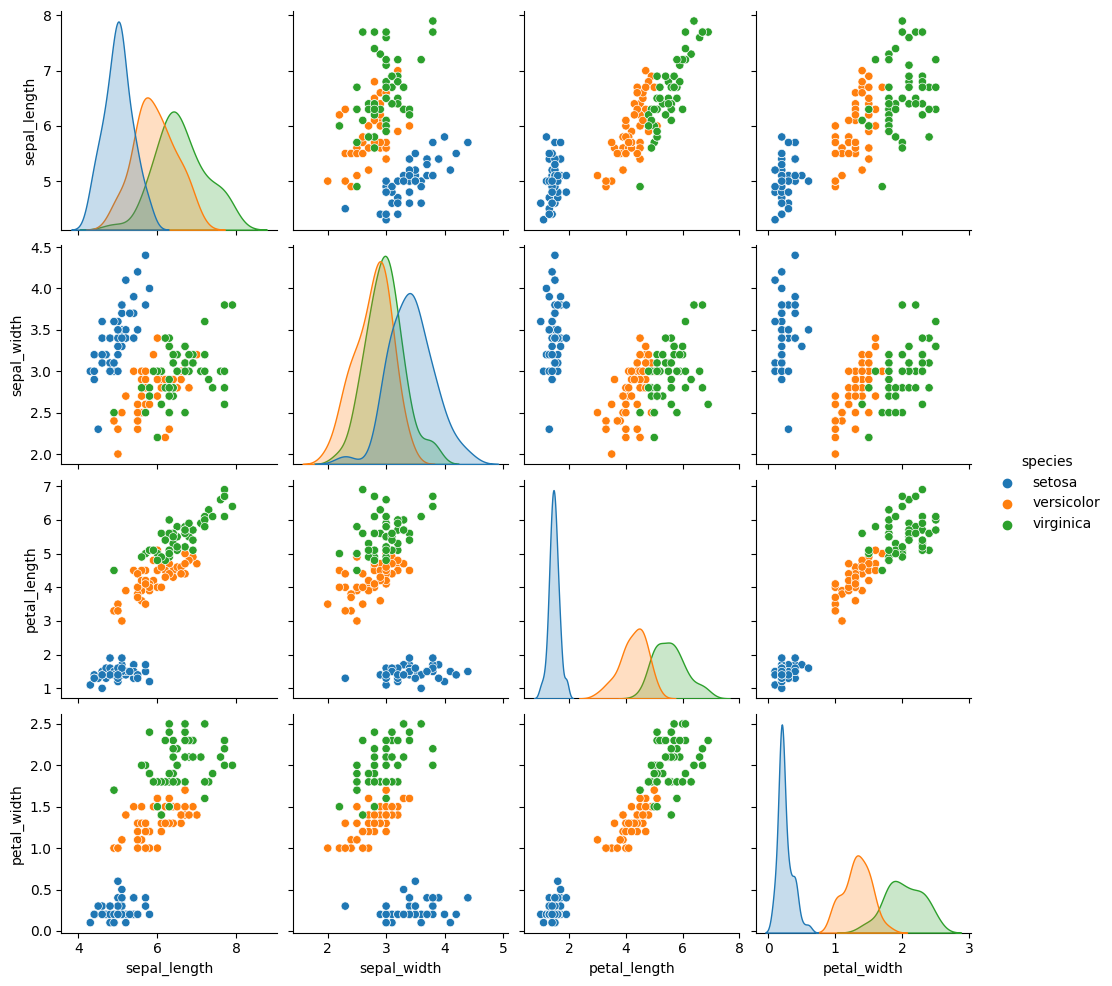

In [139]:
sns.pairplot(data = iris, hue = "species");

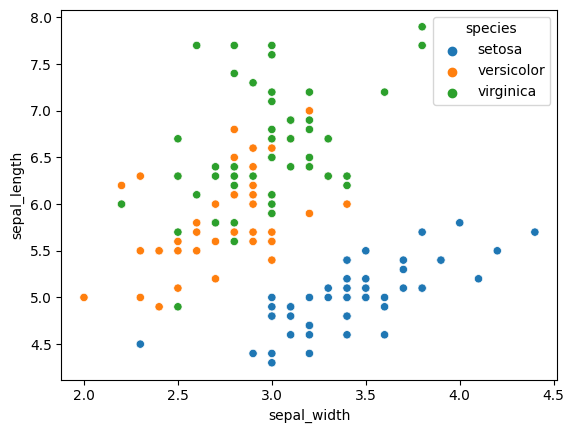

In [140]:
sns.scatterplot(data = iris,
                x = "sepal_width",
                y = "sepal_length",
                hue = "species");

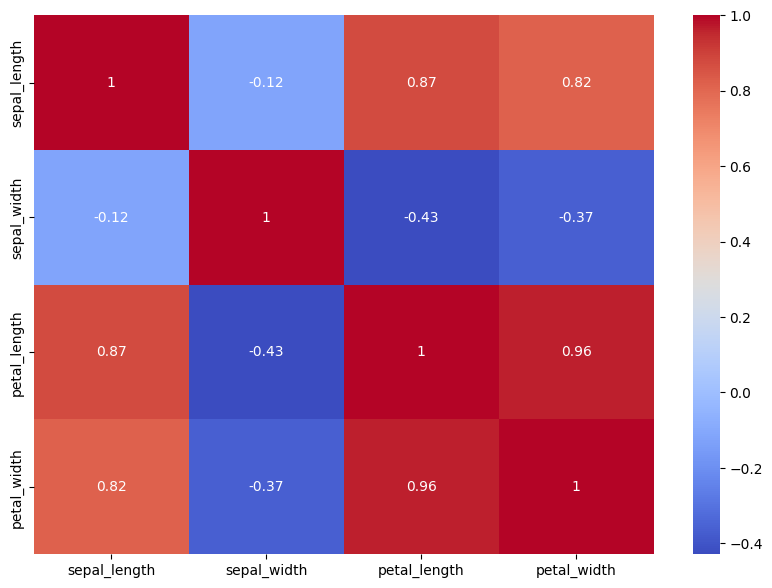

In [141]:
plt.figure(figsize = (10, 7))
sns.heatmap(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr(), annot = True, cmap = "coolwarm");

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pa

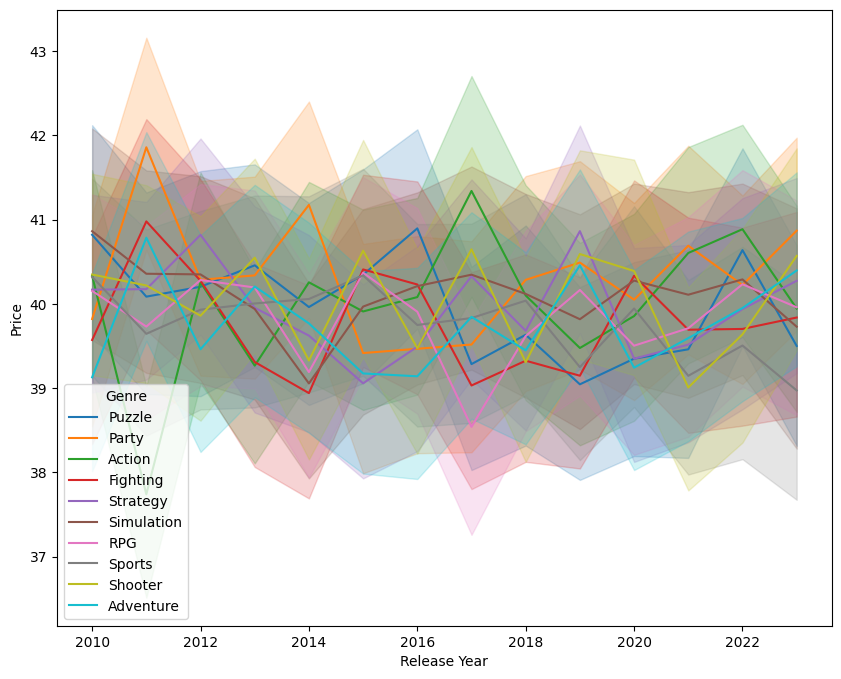

In [143]:
plt.figure(figsize = (10, 8))
sns.lineplot(data = df,
             x = "Release Year",
             y = "Price",
             hue = "Genre");

In [145]:
df = df_.copy()

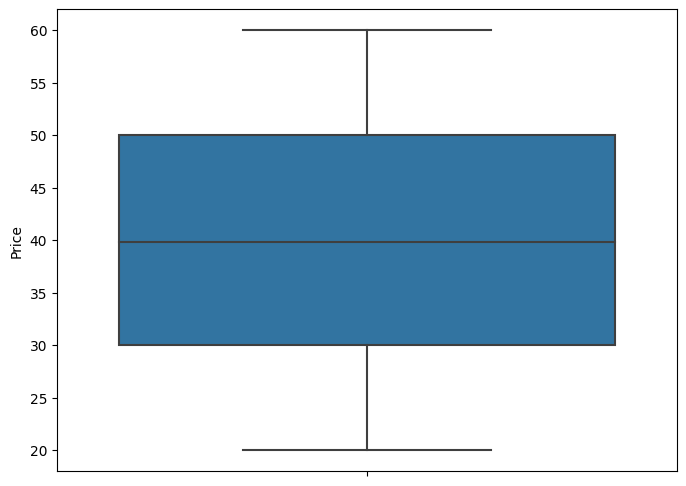

In [147]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df,
            y = df["Price"],
            orient = "v");

In [148]:
df_Price = df['Price']
df_Price

0        41.41
1        57.56
2        44.93
3        48.29
4        55.49
         ...  
47769    49.11
47770    31.69
47771    44.90
47772    29.99
47773    22.20
Name: Price, Length: 47774, dtype: float64

In [149]:
Q1 = df_Price.quantile(0.25)
Q3 = df_Price.quantile(0.75)

print(Q1)
print(Q3)

# IQR değerin belirlenmesi.
IQR = Q3-Q1
print(IQR)

# Alt ve üst sınırların belirlenmesi.
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR

29.99
49.9575
19.967500000000005


In [150]:
outlier_idx = df_Price[df_Price > upper_fence].index

outlier_idx

Index([], dtype='int64')

In [151]:
df_Price[df_Price > upper_fence]

Series([], Name: Price, dtype: float64)

5.1 Aykırı Gözlemlerin Silinmesi

In [152]:
df_del = df[~(df_Price > upper_fence)]

df_del

,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
0,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015,Adventure,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1
1,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3
2,Minecraft,26.8,Teens,44.93,PC,Yes,Bungie,Capcom,2012,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphics could be better.",Offline,5
3,Bioshock Infinite,38.4,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015,Sports,No,41.9,Medium,Good,Excellent,"Solid game, but the graphics could be better.",Online,4
4,Half-Life: Alyx,30.1,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022,RPG,Yes,13.2,High,Poor,Good,"Great game, but too many bugs.",Offline,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47769,Minecraft,41.6,All Ages,49.11,PlayStation,Yes,Valve,Innersloth,2016,Party,No,56.7,Low,Excellent,Average,"Amazing game, but the graphics could be better.",Online,4
47770,The Legend of Zelda: Breath of the Wild,24.2,Kids,31.69,Xbox,Yes,Valve,Electronic Arts,2023,Strategy,No,29.7,High,Good,Excellent,"Solid game, but the graphics could be better.",Offline,1
47771,Animal Crossing: New Horizons,26.7,All Ages,44.90,PlayStation,Yes,Game Freak,Square Enix,2018,Sports,No,8.2,Low,Poor,Good,"Great game, but the gameplay is amazing.",Offline,5
47772,The Legend of Zelda: Breath of the Wild,22.5,Kids,29.99,Xbox,Yes,Epic Games,Epic Games,2018,Simulation,Yes,29.7,High,Poor,Excellent,"Disappointing game, but the graphics could be ...",Offline,1


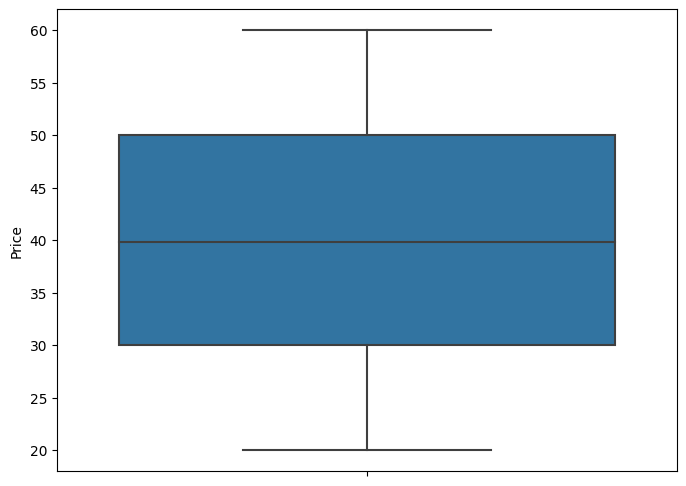

In [153]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df_del["Price"],
            orient = "v");

In [155]:
df.loc[df_Price > upper_fence, "Price"] = df_Price.mean()

In [156]:
df.loc[df_Price > upper_fence, "Price"]

Series([], Name: Price, dtype: float64)

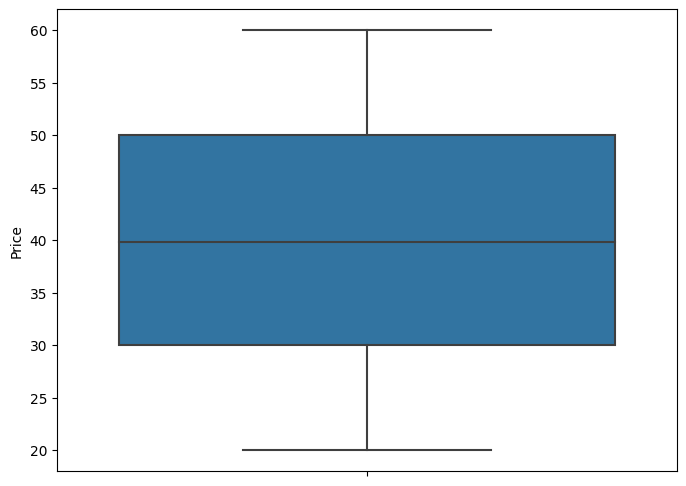

In [157]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df["Price"],
            orient = "v");

5.2.2 Baskılama Yöntemi

In [158]:
df = df_.copy()

In [159]:
df.loc[df_Price > upper_fence, "Price"] = upper_fence

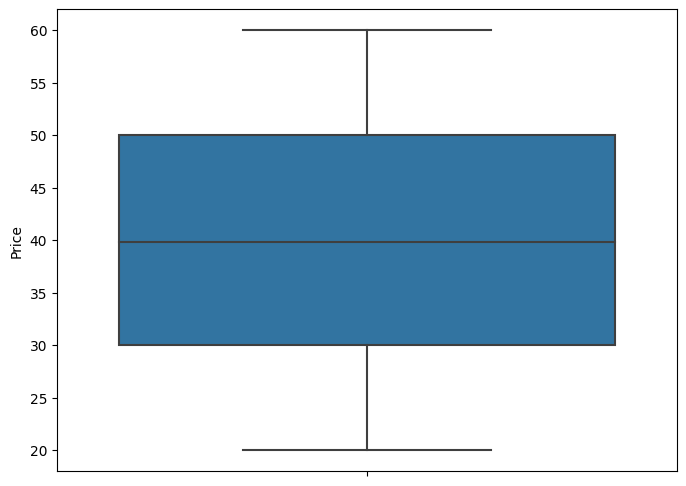

In [160]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df["Price"],
            orient = "v");

In [161]:
df.head()

,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
0,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015,Adventure,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1
1,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3
2,Minecraft,26.8,Teens,44.93,PC,Yes,Bungie,Capcom,2012,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphics could be better.",Offline,5
3,Bioshock Infinite,38.4,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015,Sports,No,41.9,Medium,Good,Excellent,"Solid game, but the graphics could be better.",Online,4
4,Half-Life: Alyx,30.1,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022,RPG,Yes,13.2,High,Poor,Good,"Great game, but too many bugs.",Offline,1


In [162]:
def price_range(price):
    if price < 80000:
        return 'Low'
    elif 80000 <= price <= 150000:
        return 'Medium'
    else:
        return 'High'

# Veriye price_range fonksiyonunu uygulayalım
df['price_range'] = df['Price'].apply(price_range)

# İlk 3 satırı kontrol edelim
df.head(3)


,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players,price_range
0,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015,Adventure,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1,Low
1,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3,Low
2,Minecraft,26.8,Teens,44.93,PC,Yes,Bungie,Capcom,2012,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphics could be better.",Offline,5,Low
